# Representações

**Objetivos**
1. Entender as diferentes representações de música
1. Treinar um pouco de música com music21

**Resultado Esperado**
1. Uma base nem conceitos simples de música e representações para o resto do curso

## Pacotes Necessários

Para conseguir entender um pouco de música e midi, será necessária a instalação do pacote [Music21](https://web.mit.edu/music21/). Instale o pacote no seu ambiente anaconda configurado no primeiro lab. O mesmo serve para tocar e manipular arquivos midi e MusicXML. Para instalar o pacote execute o comando abaixo em um terminal.

```bash
pip install music21
```

Além do Music21, instale os programas:

1. [Lilypond](http://lilypond.org/)
1. [MuseScore](https://musescore.com/)


### Configurando o Music21

Os dois são necessários para que o music21 funcione. Depois de instalar os programas execute os comandos abaixo em um Notebook ou prompt Python.

```python
from music21 import *
configure.run()
```

*Caso o Music21 não funcione*

O comando acima deve configurar automaticamente o Music21. Caso não funcione, altere o arquivo `~/.music21rc`. Isto deve ser algo como `/home/usuario/.music21rc` no Linux ou WSL, `/Users/usuario/.music21rc`, ou `music21-settings.xml` no diretório Dados de Aplicatio (Application Data) no Windows. 

Garanta que os caminhos apontam para os executáveis dos aplicatiovos. No Windows serão os .exe de cada um. Abaixo coloco as entradas corretas para um ambiente Windows.

```
<settings encoding="utf-8">
  ...
  <preference name="lilypondPath" value="/usr/bin/lilypond" />
  <preference name="musescoreDirectPNGPath" value="/usr/bin/musescore" />
  <preference name="musicxmlPath" value="/usr/bin/musescore" />
  ...
</settings>
```

## Imports Básicos

In [1]:
from music21 import *

import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()

## Parte 1: Notas Musicais

Na aula nós vimos que toda nota musical representa uma frequência. Com o music21, podemos tocar uma nota da forma abaixo.

In [2]:
n = note.Note('G4')
n.show('midi')

Podemos pegar a frequência com o código abaixo.

In [3]:
print(n.pitch.frequency)

391.99543598174927


**Questão 01:** Crie uma função Python (abaixo) que aumenta *uma oitava* na nota musical, isto é, recebe um nome de uma nota e retorna **uma nova nova** uma oitava acima. Leia a documentação do music21 ou faça um código em python na mão mesmo.

In [4]:
def aumenta_oitava(n: note.Note):
    return note.Note(n.name + str(n.octave + 1))

**Questão 02:** Escreva no markdown abaixo como aumentar uma oitava muda a frequência.

- **Resposta:** Ao aumentarmos a nota em uma oitava, nós estamos multiplicando a sua frequência por 2. Podemos observar esse fenômeno na célula abaixo utilizando a função ``aumenta_oitava`` e exibindo a nova frequência da nota. Note que há algum erro associado com ponto flutuante, mas essencialmente estaremos multiplicando a frequência por 2.

In [5]:
a4 = note.Note('A4')
a5 = aumenta_oitava(a4)

print('Frequencia da nota A4:', a4.pitch.frequency)
print('Frequencia da nota A5:', a5.pitch.frequency)

Frequencia da nota A4: 440.0
Frequencia da nota A5: 880.0000000000003


## Parte 2: Midi e Partituras

**Questão 03** Indique quais notas são tocadas na melodia abaixo. Por exemplo, caso seja do-re-mi, a resposta é 'c4 d4 e4'. Lembre-se que isso é uma clave de sol. A clave indica o local do dó,fica: **na linha tocada pelo extremo mais direito do & (e comercial).** O sol indicado pela clave é o 'g4'.

![](./q02.png)

- **Resposta:** As notas da melodia são: g4, f4, g4, c4, b4, c4.

**Questão 04** Crie um código que gera as primeiras n posições de fibonacci. A sequência começa de com `[0, 1]`. Estas são as duas primeiras posições. Com as n-posições, gere uma melodia em music21 que inicia de `eb4`.

Para cada valor da sequência você vai iniciar do valor `eb4` (mi bemol na quarta oitava) e subir um semi-tom. Lembrando que temos 12 semitons na escala cromática abaixo. 

![](./cromo.jpg)

Abaixo temos a primeira nota.

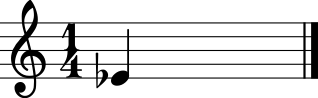

In [6]:
n = note.Note("eb4")
n.show()

In [7]:
n.pitch.spanish

'mi bèmol'

Ao somar um tempos que ir para `mi` (e4). Ao somar dois para `fa` (f4). Abaixo temos um exemplo com os primeiros números da sequência:

`0 1 1 2 3 5 8`.

/home/thiagopoppe/anaconda3/envs/mir/lib/python3.9/site-packages/music21/musicxml/m21ToXml.py:464: MusicXMLWarning: <music21.stream.Score 0x7f1b795d5550> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


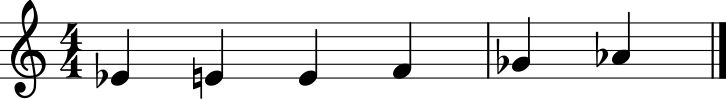

In [8]:
score = stream.Score()
txt_notes = ['eb4', 'e4', 'e4', 'f4', 'gb4', 'ab4']  # observe que seguimos no b4, vamos para 5 depois do si.
for name in txt_notes:
    score.append(note.Note(name))
score.show()

In [9]:
score.show('midi')

Porém, fazer esse código na mão pode ser chato. Portanto, podemos usar MIDI!  A equação abaixo retorna uma frequência com base em seu código MIDI.

$$F(p) = 2^{\frac{p-69}{12}} 440$$

A4 em MIDI é 69. Entre A4 e A5 existem 12 semi-tons na escala cromática. A5 tem o dobro da frequêncdia de A4. Assim, podemos pensar nessa equação da seguinte forma. Para sair de A4 para A5 precisamos multiplicar por 2.

$$F(p) = 2 \cdots 440 $$

Só que esse intervalo é quebrado em 12 semi-tons, cada um crescendo em escala log.

$$F(p) = 2^{\frac{p-?}{12}} 440 $$

Assim as notas até A5 vão crescer iniciando de A4 multiplicando A4 por: $2^{1/12}$, $2^{1/12}$, $2^{1/12}$, $2^{1/12}$, $\cdots$, $2^{12/12}$. Esta última é 2x A4.

Como MIDI inicia em 69. Chegamos em:

$$F(p) = 2^{\frac{p-69}{12}} 440 $$

Assim podemos caminhar via midi como abaixo!

In [10]:
note.Note(pitch.Pitch(69 + 5))

<music21.note.Note D>

In [11]:
def fibo(n: int):
    if n == 1:
        return [0]
    
    sequence = [0, 1]
    for i in range(2, n):
        sequence.append(sequence[i-1] + sequence[i-2])
    
    return sequence

# Nós queremos começar de eb4, logo, devemos ajustar o valor 69 (que representa A4)
def fibo_melody(n: int):
    score = stream.Score()
    eb4_midi_value = note.Note('eb4').pitch.midi
    
    for i in fibo(n):
        score.append(note.Note(pitch.Pitch(eb4_midi_value + i)))
        
    return score    

/home/thiagopoppe/anaconda3/envs/mir/lib/python3.9/site-packages/music21/musicxml/m21ToXml.py:464: MusicXMLWarning: <music21.stream.Score 0x7f1b7953b670> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


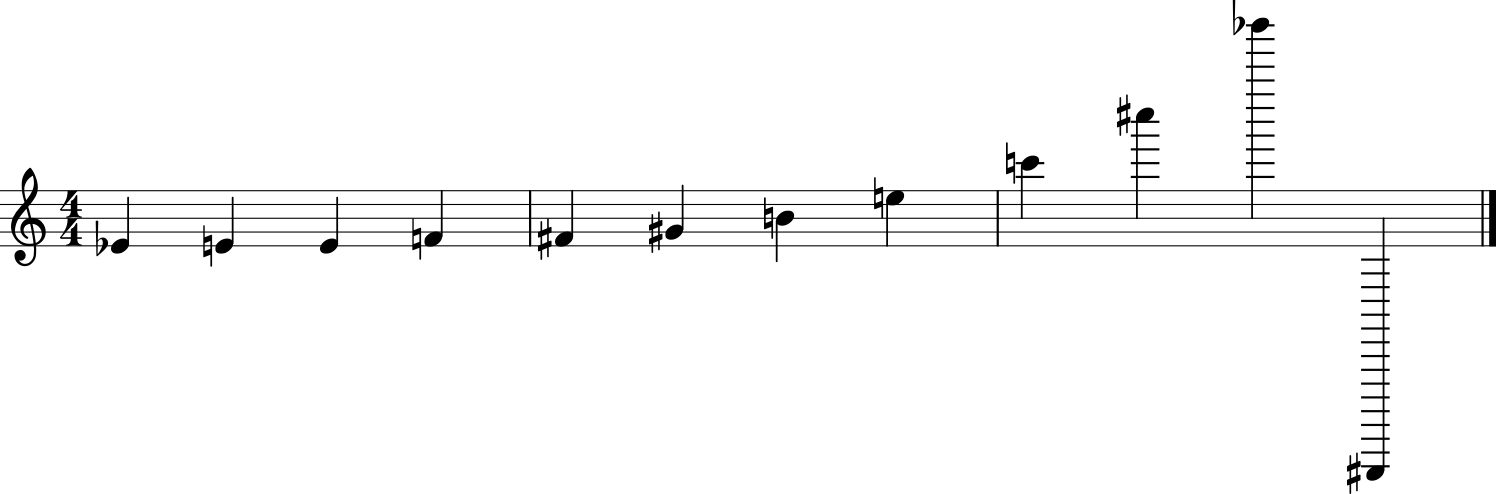

In [12]:
s = fibo_melody(12)
s.show()

**Questão 5** Plote o piano roll da sua música abaixo. Use `score.plot('pianoroll')`

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x7f1b794d9ac0>>

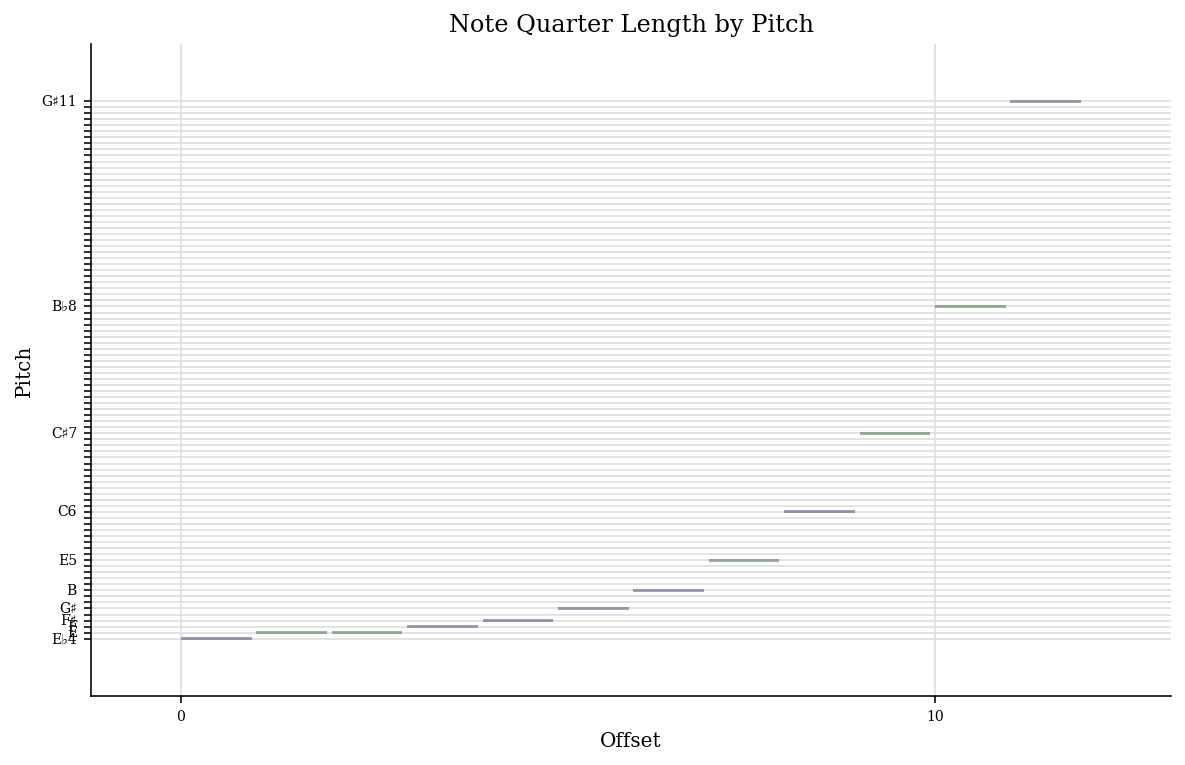

In [13]:
s.plot('pianoroll')

**Questão 6** Gere um XML da sua melodia. Leia o mesmo, só pelo esporte.

- **Resposta:** Consegui achar a seguinte forma de exportar para XML, não sei se é a melhor forma de se fazer. Nela, conseguimos observar, com uma certa dificuldade, as notas que nós criamos dentro das tags <note> para cada compasso.

In [14]:
GEX = musicxml.m21ToXml.GeneralObjectExporter(s)
out = GEX.parse()

outstr = out.decode('utf-8')
print(outstr.strip())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE score-partwise  PUBLIC "-//Recordare//DTD MusicXML 3.1 Partwise//EN" "http://www.musicxml.org/dtds/partwise.dtd">
<score-partwise version="3.1">
  <movement-title>Music21 Fragment</movement-title>
  <identification>
    <creator type="composer">Music21</creator>
    <encoding>
      <encoding-date>2021-11-07</encoding-date>
      <software>music21 v.7.1.0</software>
    </encoding>
  </identification>
  <defaults>
    <scaling>
      <millimeters>7</millimeters>
      <tenths>40</tenths>
    </scaling>
  </defaults>
  <part-list>
    <score-part id="P6e25e180f0efc1eeb433328251cae136">
      <part-name />
    </score-part>
  </part-list>
  <!--=========================== Part 1 ===========================-->
  <part id="P6e25e180f0efc1eeb433328251cae136">
    <!--========================= Measure 1 ==========================-->
    <measure number="1">
      <attributes>
        <divisions>10080</divisions>
        <time>
          <beats

/home/thiagopoppe/anaconda3/envs/mir/lib/python3.9/site-packages/music21/musicxml/m21ToXml.py:464: MusicXMLWarning: <music21.stream.Score 0x7f1b7194f400> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',
